# All Ireland M.bovis strain diversity and clade identification

In [126]:
import sys,os,io,shutil,subprocess
import glob
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
from Bio import SeqIO
import seaborn as sns
sys.path.append('pathogenie')
from snipgenie import tools, aligners, app, trees, plotting, rdiff
import toytree, toyplot
import toyplot.pdf
path = '/storage/btbgenie/all_ireland_results'

## get meta data

In [127]:
meta = pd.read_csv('/storage/btbgenie/mbovis_ireland/all_ireland_samples.csv')
print (len(meta))

636


In [ ]:
dups=meta[meta.duplicated('aliquot')].dropna()
#print (dups)
for i,r in dups.iterrows():
    print (meta[meta.aliquot== r.aliquot])
#meta[(meta.batch.isin([2,3,4])) & (~meta.aliquot.isin(dups.aliquot)) & (meta.county=='Monaghan')]

## run NI

In [ ]:
reload(app)
args = {'threads':20, 'outdir': '/storage/btbgenie/NI_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/NI'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

## NI AFBI

In [ ]:
reload(app)
args = {'threads':16, 'outdir': '/storage/btbgenie/NI_AFBI_results', 
        'labelsep':'Gen_','labelindex':1,
        'input':['/storage/btbgenie/mbovis_ireland/NI_AFBI'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

In [72]:
treefile = '/storage/btbgenie/NI_AFBI_results/tree.newick'
tre = toytree.tree(treefile)
canvas,t,r=tre.draw(layout='r',width=1000,height=1000,
                    scalebar=True,);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="1000.0px" viewBox="0 0 1000.0 1000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t208c0d4debe3489997e5dbd0d2365953"> 038_Bov_2004_2.142 048_Bov_2005_2.142 036_Bov_2004_2.142 027_Bov_2004_2.142 324_Bov_2015_2.142 005_Bov_2000_2.142 307_Bov_2013_2.142 182_Bad_2021_2.142 041_Bov_2005_2.142 045_Bov_2003_1.140 004_Bov_2000_1.140 001_Bov_2001_1.140 043_Bov_2003_1.140 026_Bov_2004_4.140 047_Bov_2005_4.140 035_Bov_2004_19.140 187_Bad_2018_5.140 037_Bov_2004_5.140 346_Bov_2016_5.140 305_Bov_2013_5.140 227_Bov_20XX_14.140 212_Bov_20XX_14.140 044_Bov_2003_8.140 235_Bov_20XX_5.140 115_Bov_2007_18.129 018_Bov_2003_18.129 378_Bov_2017_11.145 190_Bov_20XX_24.130 210_Bov_20XX_24.130 034_Bov_2004_24.130 040_Bov_2005_27.140 ref 023_Bov_2004_6.263 077_Bov_2006_3.975 133_Bov_2007_3.975 132_Bov_2007_3.975 050_Bov_2005_3.140 364_Bov_2017_3.140 301_Bov_2013_3.140 009_Bov_1999_3.140 032_Bov_2004_3.140 046_Bov_2003_3.140 029_Bov_2004_7.140 002_Bov_2001_7.140 008_Bov_2000_3.140 031_Bov_2004_3.140 006_Bov_2000_3.140 254_Bov_20XX_3.140 049_Bov_2005_3.140 030_Bov_2004_3.140 003_Bov_2001_3.140 028_Bov_2004_3.140 033_Bov_2004_25.140 007_Bov_2000_25.140 0 54 108 161 215 269 323 376 430 484

## misc 2021 samples (Kevin)

In [ ]:
args = {'threads':20, 'outdir': '/storage/btbgenie/misc_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/Misc'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

In [ ]:
reload(app)
mask='/home/farrell/gitprojects/snipgenie/snipgenie/data/Mbovis_AF212297_mask.bed'
vcf_file='/storage/btbgenie/misc_results/snps.vcf.gz'
app.mask_filter(vcf_file, mask)

In [244]:
present=pd.read_csv('/storage/btbgenie/misc_results/summary.csv')
present['sample']=present['sample'].astype(str)
#print (present[:10])
l=list(W.fastq_table['sample'].unique())

s=meta[meta.batch>=3].sort_values(by='sample')
#s['label'] = s['sample'].apply(lambda x : x.split('-')[1][-4:]).astype(str)
#s=s.sort_values('label')

p = present[~present['sample'].isin(s['sample'])]
#p = (s[s['label'].isin(l)])
print (p)
print (len(s),len(p), len(present))

         sample                           name                                           bam_file  read_length
25  TB19-004280  TB19-004280_S68_L001-4_R2_001  /storage/btbgenie/misc_results/mapped/TB19-004...          149
48  TB19-005887  TB19-005887_S29_L001-4_R2_001  /storage/btbgenie/misc_results/mapped/TB19-005...          150
65 2 61


In [284]:
reload(trees)
spo=pd.read_csv('/storage/btbgenie/all_ireland_results/misc_spoligotypes.csv')
treefile = '/storage/btbgenie/misc_results/tree.newick'
tre = toytree.tree(treefile)
tipnames = tre.get_tip_labels()
mapping = dict(zip(meta['sample'],meta.county))
colormap = trees.colors_from_labels(meta,'name','county')
tip_colors = [colormap[mapping[i]] if i in mapping else 'Black' for i in tipnames]

canvas,t,r=tre.draw(layout='r',width=1000,height=1000,tip_labels_colors=tip_colors,
                    scalebar=True,);
toyplot.pdf.render(canvas,'/storage/btbgenie/all_ireland_results/misc_samples_tree.pdf')

## run CVRL samples

In [ ]:
args = {'threads':20, 'outdir': '/storage/btbgenie/cvrl_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/CVRL'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

## UK samples?

In [ ]:
args = {'threads':20, 'outdir': '/storage/btbgenie/UK_results', 'labelsep':'_',
        'input':['/storage/btbgenie/??'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

In [ ]:
reload(trees)
spo=pd.read_csv('/storage/btbgenie/all_ireland_results/cvrl_spoligotypes.csv')
treefile = '/storage/btbgenie/cvrl_results/tree.newick'
tre = toytree.tree(treefile)
tipnames = tre.get_tip_labels()
mapping = dict(zip(meta['sample'],meta.county))
colormap = trees.colors_from_labels(meta,'name','county')
tip_colors = [colormap[mapping[i]] if i in mapping else 'Black' for i in tipnames]

canvas,t,r=tre.draw(layout='r',width=1000,height=1400,tip_labels_colors=tip_colors,
                    scalebar=True,);

## integrate previously aligned bam files together and call variants

This allows us to join previously mapped results together in one call without re-aligning

In [66]:
outdir='/storage/btbgenie/all_ireland_results'

folders = {'wicklow':'/storage/btbgenie/wicklow_results',
          'cvrl':'/storage/btbgenie/cvrl_results',
          'misc':'/storage/btbgenie/misc_results',
          'monaghan':'/storage/btbgenie/monaghan/monaghan_results',
          'NI':'/storage/btbgenie/NI_results/',
          'AFBI':'/storage/btbgenie/NI_AFBI_results/',
          }

x=[]
for f in folders:
    print (f)
    file = os.path.join(folders[f],'samples.csv')   
    df=pd.read_csv(file)
    x.append(df)
samples = pd.concat(x)
print (len(samples))
samples.to_csv('/storage/btbgenie/all_ireland_results/samples.csv',index=False)
app.write_samples(samples[['sample']], outdir)
bam_files = list(samples.bam_file)

wicklow
cvrl
misc
monaghan
NI
AFBI
570


## run previously aligned files

In [4]:
reload(app)
gff_file=os.path.join(outdir,'mbovis.gff')
tools.gff_bcftools_format(app.mbovis_gb, gff_file)
app.run_bamfiles(bam_files, app.mbovis_genome, outdir='/storage/btbgenie/all_ireland_results', threads=16,                
                 mask=app.mbovis_mask, gff_file=gff_file,
                 custom_filters=True, overwrite=False)

raxmlHPC-PTHREADS -f a -N 100 -T 8 -m GTRCAT -V -p 14234711 -x 86378030 -n variants -w /storage/btbgenie/all_ireland_results -s /storage/btbgenie/all_ireland_results/core.fa


## spoligotypes of all samples

In [87]:
reload(tools)
spo = pd.read_csv('/storage/btbgenie/mbovis_ireland/spoligotypes.csv')
done=list(spo['sample'])
res=[]
for i,r in samples.iterrows():
    f=r.filename1
    samp=r['sample']
    if samp in done:
        continue
    b = tools.get_spoligotype(f)
    sb = tools.get_sb_number(b)
    print (f,samp,sb, b)
    res.append([f,samp,sb,b])
 
res = pd.DataFrame(res,columns=['filename','sample','SB','code'])
#append new spotypes to current file
res=pd.concat([spo,res])

In [7]:
len(res),len(meta)
#meta[~meta['sample'].isin(res['sample'])]
#res.to_csv('/storage/btbgenie/mbovis_ireland/spoligotypes.csv',index=False)

(570, 636)

<div class="alert alert-block alert-info"><b>Post analysis starts here</b> </div>

## clusters

In [128]:
clusts = trees.get_clusters('/storage/btbgenie/all_ireland_results/tree.newick')

TreeCluster.py  -i /storage/btbgenie/all_ireland_results/tree.newick -t 3 -m max_clade
TreeCluster.py  -i /storage/btbgenie/all_ireland_results/tree.newick -t 5 -m max_clade
TreeCluster.py  -i /storage/btbgenie/all_ireland_results/tree.newick -t 7 -m max_clade
TreeCluster.py  -i /storage/btbgenie/all_ireland_results/tree.newick -t 10 -m max_clade
TreeCluster.py  -i /storage/btbgenie/all_ireland_results/tree.newick -t 12 -m max_clade
TreeCluster.py  -i /storage/btbgenie/all_ireland_results/tree.newick -t 20 -m max_clade
TreeCluster.py  -i /storage/btbgenie/all_ireland_results/tree.newick -t 50 -m max_clade
TreeCluster.py  -i /storage/btbgenie/all_ireland_results/tree.newick -t 100 -m max_clade


[25, 71, 92, 17, 37, 9, 22, 80, 27, 90, 85, 30, 11, 70, 89, 52, 79, 74, 68]


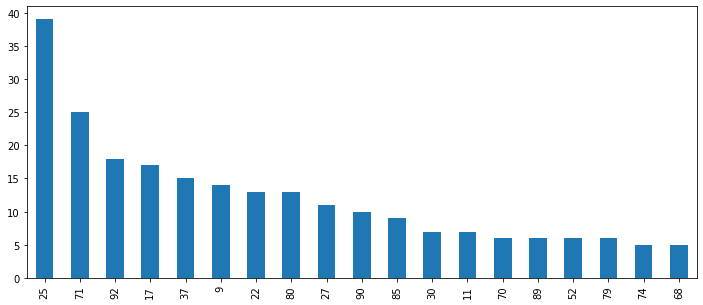

In [129]:
cc = clusts.snp12.value_counts()[1:20]
cc.plot(kind='bar',figsize=(12,5))
print (list(cc.index))

In [130]:
common = meta.county.value_counts()[:7]
def cty_comm(x):
    if x in common:
        return x
    else:
        return 'Other'
meta['county1'] = meta.county.apply(cty_comm)
meta['county2'] = meta.county.apply(lambda x : x if x in ['Monaghan','Clare'] else 'Other')
common

Monaghan    192
Clare       157
NI           86
Wicklow      50
Cork         26
Meath        16
Cavan        13
Name: county, dtype: int64

In [134]:
spo = pd.read_csv('/storage/btbgenie/all_ireland_results/spoligotypes.csv')

In [136]:
final = meta.merge(spo[['sample','SB']],on='sample',how='left')
final = final.merge(clusts,left_on='sample',right_on='SequenceName')
len(final)

567

In [137]:
common = final.SB.value_counts()[:6]
def sb_comm(x):
    if x in common:
        return x
    else:
        return 'Other'
final['SB1'] = final.SB.apply(sb_comm)   

## assign clade names - replace with lineage calling?

In [ ]:
import string
labels=list(string.ascii_uppercase)
clmap={}
found=[]
i=0
for c,g in final.groupby('ClusterNumber'):    
    if len(g)==0: continue    
    cts = g.county.value_counts()
    top = cts[0]
    if top>10:         
        clmap[c]=labels[i]
        i+=1
    else:
        clmap[c]='Other'

## RD analysis

In [ ]:
reload(rdiff)
rdiff.create_rd_index()
samples = pd.read_csv('/storage/btbgenie/all_ireland_results/samples.csv')
res = rdiff.run_samples(samples,'/storage/btbgenie/all_ireland_results/rd_aligned',threads=12)
X = rdiff.get_matrix(res, cutoff=0.15)
X['ident'] = X.apply(rdiff.apply_rules,1)
X.to_csv('/storage/btbgenie/mbovis_ireland/rd.csv')

In [ ]:
reload(rdiff)
rdiff.show_rd_coverage(samples[:4], 'LT708304.1',4310000,4330000,app.mbovis_genome,app.mbovis_gb,margin=1300)

In [69]:
wick=list(meta[meta.county=='Wicklow']['sample'])

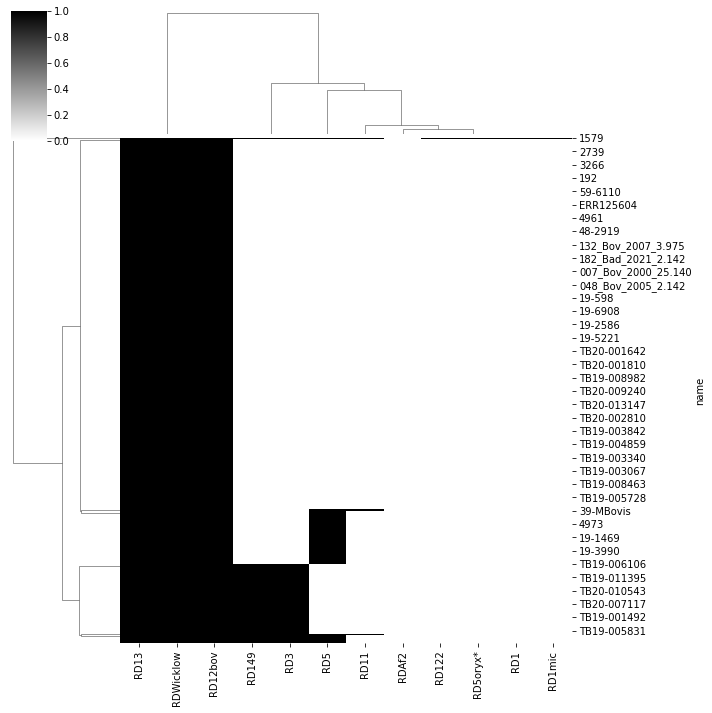

In [138]:
R=pd.read_csv('/storage/btbgenie/mbovis_ireland/rd.csv',index_col=0)
R=R.iloc[:,:-1]
#cols=X.columns[(X.sum()<len(X)-1) & (X.sum()>0)]
cols = ['RD1','RD1mic','RDWicklow','RD11','RD12bov','RD13','RD149','RD3','RD5','RD5oryx*','RD122','RDAf2']
R = R[cols]
#fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.clustermap(R,cmap='gray_r',figsize=(10,10))

In [139]:
final = final.merge(R,left_on='sample',right_index=True)
final.to_csv('/storage/btbgenie/all_ireland_results/metadata.csv',index=False)

## draw all ireland tree

In [ ]:
treefile = '/storage/btbgenie/all_ireland_results/tree.newick'
tre = toytree.tree(treefile)
canvas,t,r=tre.draw(height=1000,width=1000)

In [ ]:
reload(trees)
#tre = tre.root('TB20-002800')
#tre = tre.drop_tips('8567')
tipnames = tre.get_tip_labels()
mapping = dict(zip(final['sample'],final.clade))
#mapping['ref'] = 'AF2122/97'
tiplabels = [mapping[i] if i in mapping else 'NA' for i in tipnames]

colormap = trees.colors_from_labels(final,'name','clade')
print (colormap)
tip_colors = [colormap[mapping[i]] if i in mapping else 'Black' for i in tipnames]
tip_labels_style={      
        "font-size": "6px",
        "-toyplot-anchor-shift": "13px",
    }
node_sizes=[0 if i else 5 for i in tre.get_node_values(None, 1, 0)]
node_colors = [colormap[mapping[n]] if n in mapping else 'black' for n in tre.get_node_values('name', True, True)]

canvas,t,r=tre.draw(layout='r',width=1200,height=1300,node_markers="o",node_hover=True, node_sizes=node_sizes,
                    tip_labels=False,tip_labels_style=tip_labels_style,node_colors=node_colors,
                    tip_labels_colors=tip_colors,scalebar=True,edge_widths=1);
#toyplot.pdf.render(canvas,'/storage/btbgenie/all_ireland_results/ireland_tree.pdf')

## SNP analysis

* snps unique to each clade/county
* protein groups containing common snps

In [22]:
csq = app.read_csq_file('/storage/btbgenie/all_ireland_results/csq.tsv')
snp_mat = app.get_aa_snp_matrix(csq)
#csq_ind = app.read_csq_file('/storage/btbgenie/all_ireland_results/csq_indels.tsv')
#ind_mat = app.get_aa_snp_matrix(csq_ind)

In [23]:
mat = snp_mat

#labelmap = dict(zip(meta['name'],meta.county))
#mat = mat.rename(columns=labelmap)
#freqs = mat.sum(1)/len(mat.columns)
#freqs =freqs.rename('freq') 
#freqs.sort_values()
#freqs.hist(bins=20)

In [37]:
#mat.index = mat.index.get_level_values(1)+'_'+mat.index.get_level_values(2)
stat = mat.sum(1).reset_index()
#stat.gene.value_counts()[:30]

In [27]:
cols=['sample','county','SB','snp12']
C=mat.T
C=C.merge(final[cols],left_index=True,right_on='sample').set_index(cols).T
#print (C)
C=C[C.sum(1)>3].T
C.iloc[:4,:2]
C.to_csv('csq_snps_ireland.csv')

<ipython-input-56-f1bbb54543a8>:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (4 levels on the left, 1 on the right)
  C=C.merge(final[cols],left_index=True,right_on='sample').set_index(cols).T


In [37]:
counties = list(C.index.get_level_values(1))
sb = list(C.index.get_level_values(2))


In [60]:
c=final.county1.unique()
colors=plotting.random_colors(len(c),3)
colormap1 = dict(zip(c, colors))
colors1 = [colormap1[i] if i in colormap1 else 'Black' for i in counties]
#make legend
import matplotlib.patches as mpatches
pts=[]
for c in colormap1:
    pts.append(mpatches.Patch(color=colormap1[c],label=c))
#g=sns.clustermap(C,xticklabels=False,yticklabels=False,figsize=(17,12),cmap='gray_r',cbar_pos=None,row_colors=colors1)
#g.fig.legend(handles=pts,bbox_to_anchor=(1.05, 1), )
#g.savefig('/storage/btbgenie/all_ireland_results/snp_clusters.jpg')

## PCA

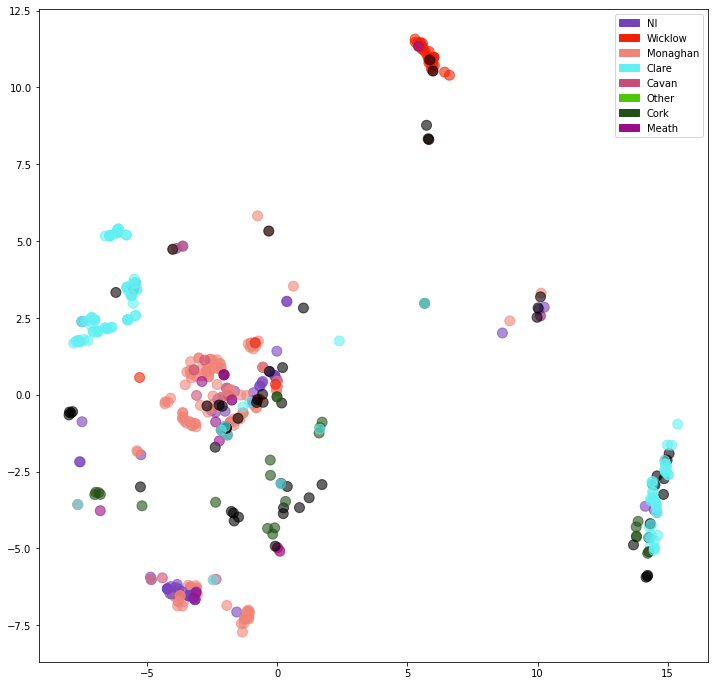

In [62]:
import sklearn
from sklearn import decomposition
from sklearn import manifold

pca = decomposition.PCA(n_components=3)
mds = manifold.MDS(n_components=3)
pos = mds.fit(C).embedding_
X = pca.fit_transform(pos)
#X = pca.transform(C)
df=pd.DataFrame(X)
df['sb']=sb
df.to_csv('/storage/btbgenie/all_ireland_results/pca_snp.csv')

fig,ax = plt.subplots(figsize=(12, 12))
sc=ax.scatter(X[:, 0], X[:, 1], c=colors1, s=100, alpha=.6)    
ax.legend(handles=pts,loc='best')
fig.savefig('/storage/btbgenie/all_ireland_results/pca_snp_clusters.jpg',dpi=150)

## compare cvrl wgmlst tree

In [ ]:
cvrltre = toytree.tree('declan.newick')
cvrltre.draw(layout='c',width=800,height=1000,
                node_markers="o",node_hover=True, #node_sizes=node_sizes,
                tip_labels=False,tip_labels_style=tip_labels_style,#node_colors=node_colors,
                scalebar=True,edge_widths=1)